In [1]:
pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,weight,hwy_mpg
0,2548,27
1,2548,27
2,2823,26
3,2337,30
4,2824,22


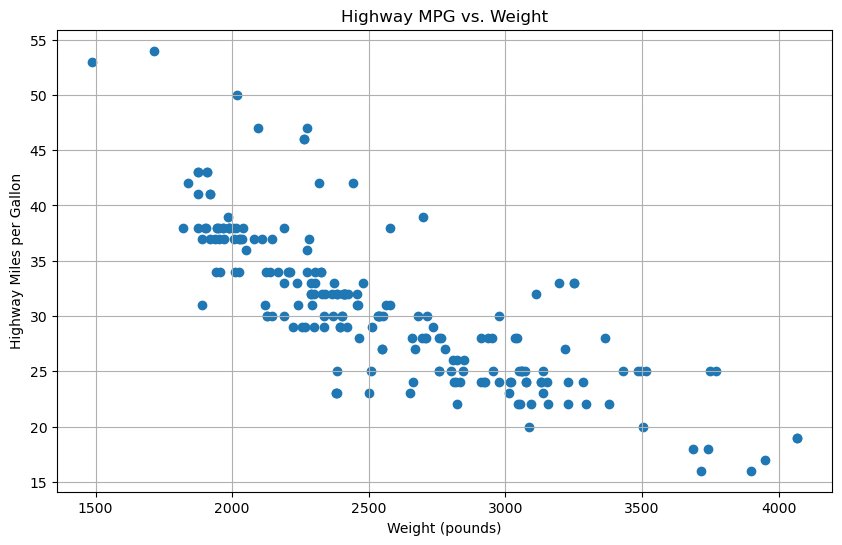

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['hwy_mpg'])
plt.title('Highway MPG vs. Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway Miles per Gallon')
plt.grid(True)
plt.show()

# General Trend
Based on the scatterplot of the car data, the general trend is that as the vehicle's weight increases, the highway miles per gallon decreases. This shows a negative or inverse relationship between these two variables.

# Expected Slope
You would expect the slope of a linear model to be negative. This is because the data points on the plot show a clear downward trend from left to right, indicating that as one variable (weight) increases, the other variable (highway mpg) decreases.

# Interpreting a Specific Slope
If the slope of the linear model is −0.05, it means that for every one-pound increase in a car's weight, the model predicts a decrease of 0.05 in its highway miles per gallon.

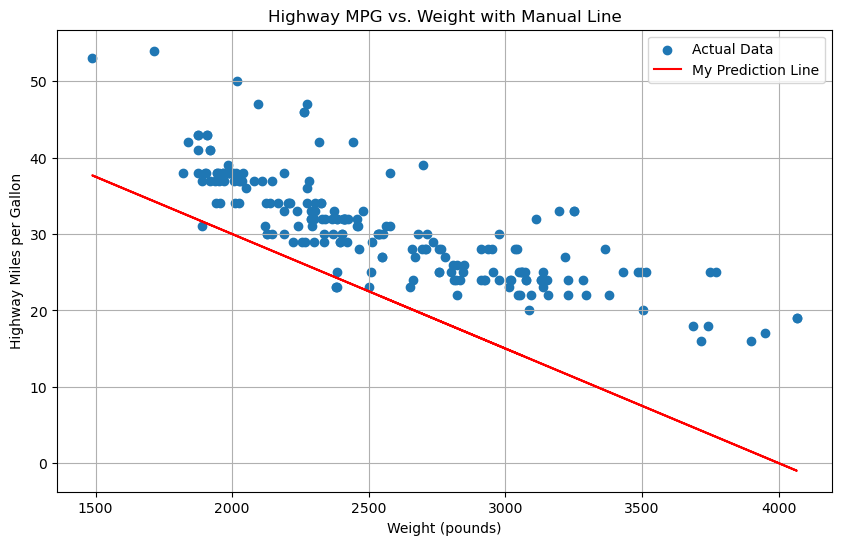

My chosen slope: -0.015
My chosen intercept: 60


In [5]:
# The slope and intercept
my_slope = -0.015  # Adjust this value
my_intercept = 60   # Adjust this value

# Calculate y-values for the line
# Using the correct column names from the data file
df['my_predicted_mpg'] = my_slope * df['weight'] + my_intercept

# Create the scatter plot with the line
plt.figure(figsize=(10, 6))
plt.scatter(df['weight'], df['hwy_mpg'], label='Actual Data')
plt.plot(df['weight'], df['my_predicted_mpg'], color='red', label='My Prediction Line')
plt.title('Highway MPG vs. Weight with Manual Line')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway Miles per Gallon')
plt.legend()
plt.grid(True)
plt.show()

print(f"My chosen slope: {my_slope}")
print(f"My chosen intercept: {my_intercept}")

Best-fit slope: -0.0105
Best-fit intercept: 57.7052


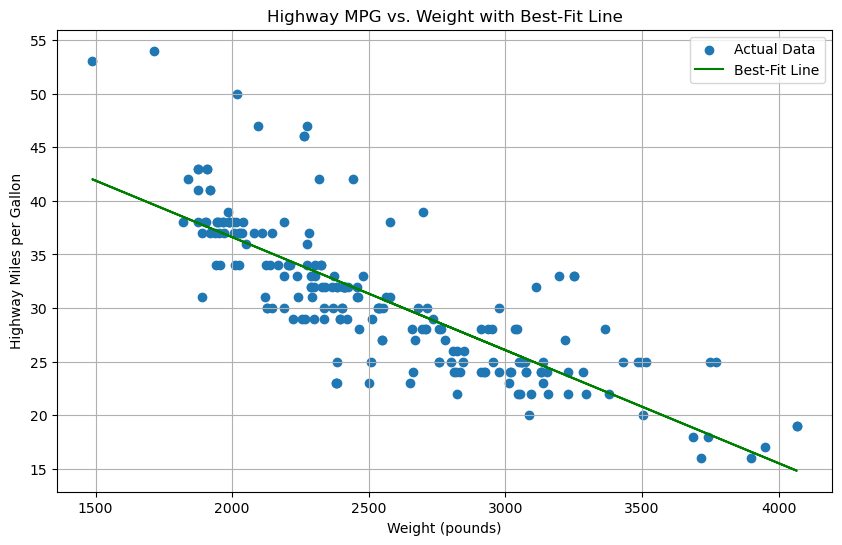

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for Scikit-learn
# The features (X) must be a 2D array, and the target (y) is a 1D array.
X = df[['weight']]
y = df['hwy_mpg']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept
best_fit_slope = model.coef_[0]
best_fit_intercept = model.intercept_

print(f"Best-fit slope: {best_fit_slope:.4f}")
print(f"Best-fit intercept: {best_fit_intercept:.4f}")

# Plot both the actual data and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X), color='green', label='Best-Fit Line')
plt.title('Highway MPG vs. Weight with Best-Fit Line')
plt.xlabel('Weight (pounds)')
plt.ylabel('Highway Miles per Gallon')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for the manually fitted line (using final slope and intercept from above)
my_predicted_mpg = my_slope * df['weight'] + my_intercept
my_rmse = np.sqrt(mean_squared_error(df['hwy_mpg'], my_predicted_mpg))
print(f"RMSE of my line: {my_rmse:.4f}")

# Calculate RMSE for the best-fit line
best_fit_predicted_mpg = model.predict(X)
best_fit_rmse = np.sqrt(mean_squared_error(df['hwy_mpg'], best_fit_predicted_mpg))
print(f"RMSE of best-fit line: {best_fit_rmse:.4f}")

RMSE of my line: 10.2499
RMSE of best-fit line: 4.1449


# How do these compare? Is this what you would expect?
The RMSE of the best-fit line should be lower than your manually fitted line. This is expected because the least-squares method used by LinearRegression is designed to minimize this error.

In [8]:
# The predicted weight
weight_to_predict = 3200

# Create a small DataFrame with the new data
# Use the same column name ('weight') as the training data.
weight_to_predict_df = pd.DataFrame([[weight_to_predict]], columns=['weight'])

# Use the best-fit model to make a prediction
predicted_mpg = model.predict(weight_to_predict_df)

print(f"The predicted highway mpg for a car that weighs {weight_to_predict} pounds is: {predicted_mpg[0]:.2f}")

The predicted highway mpg for a car that weighs 3200 pounds is: 23.95
